In [1]:
import numpy as np
import json
import os
from matplotlib import pyplot as plt
from scipy.optimize import curve_fit
from scipy.optimize import leastsq

from lmfit import Model

from alvra_tools import *
from alvra_tools.utils import errfunc_sigma, errfunc_fwhm
from alvra_tools.channels import *

[INFO][corrections] Numba not available, reverting to Numpy


### Input which data to take...

In [7]:
scan_name ="knife_edge_X_003"
scan_name = "YAG_timing_FEL0.5_8uJ_008"

DIR = "/sf/alvra/data/p17984/raw/scan_data/" + scan_name + "/"
DIR_json = "/sf/alvra/data/p17984/res/scan_info/"

### Which spectrometer channels do we have?

In [8]:
channel_PSSS_center
channel_PSSS_fwhm
channel_PSSS_x
channel_PSSS_y

'SARFE10-PSSS059:SPECTRUM_Y/data'

### Load the data using load single cannel function

In [9]:
json_file = DIR_json + scan_name + "_scan_info.json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

Energy = []
FWHM = []
PulseID = []
X = []
Y = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])
    exists = os.path.isfile(filename)
    if exists:
        print("step",i+1,"of",numFiles,": Processing %s" % (str(data['scan_files'][i][0])))
        
        (Energy_shot, pulseIDs) = \
        load_single_channel_pulseID(filename,channel_PSSS_center , 50)

        (FWHM_shot, pulseIDs) = \
        load_single_channel_pulseID(filename,channel_PSSS_fwhm , 50)

        (X_shot, pulseIDs) = \
        load_single_channel_pulseID(filename,channel_PSSS_x , 50)
        
        (Y_shot, pulseIDs) = \
        load_single_channel_pulseID(filename,channel_PSSS_y , 50)
        
        Energy.append(Energy_shot)
        FWHM.append(FWHM_shot)
        X.append(X_shot)
        Y.append(Y_shot)
        PulseID.append(pulseIDs)
        
Energy = np.asarray(Energy)
FWHM = np.asarray(FWHM)
PulseID = np.asarray(PulseID)
X = np.asarray(X)
Y = np.asarray(Y)
print ("Job done!")

/sf/alvra/data/p17984/res/scan_info/YAG_timing_FEL0.5_8uJ_008_scan_info.json
Processing 61 files
step 1 of 61 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0000.BSREAD.h5
step 2 of 61 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0001.BSREAD.h5
step 3 of 61 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0002.BSREAD.h5
step 4 of 61 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0003.BSREAD.h5
step 5 of 61 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0004.BSREAD.h5
step 6 of 61 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0005.BSREAD.h5
step 7 of 61 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5

Job done!


### Load the data using load PSSS function

In [36]:
json_file = DIR_json + scan_name + "_scan_info.json"
print (json_file)

with open(json_file) as file:
    data = json.load(file)
numFiles = len(data['scan_files'])
#numFiles = 1

print ("Processing",numFiles,"files")

Energy = []
FWHM = []
PulseID = []
X = []
Y = []

for i in range(0,numFiles):
    filename = str(data['scan_files'][i][0])
    exists = os.path.isfile(filename)
    if exists:
        print("step",i+1,"of",numFiles,": Processing %s" % (str(data['scan_files'][i][0])))
        
        (Energy_shot, FWHM_shot, X_shot, Y_shot, pulseIDs) = \
        load_PSSS_data_from_scans_pulseID(filename,channel_PSSS_center, 50)

        
        Energy.append(Energy_shot)
        FWHM.append(FWHM_shot)
        X.append(X_shot)
        Y.append(Y_shot)
        PulseID.append(pulseIDs)
        
Energy = np.asarray(Energy)
FWHM = np.asarray(FWHM)
PulseID = np.asarray(PulseID)
X = np.asarray(X)
Y = np.asarray(Y)
print ("Job done!")

/sf/alvra/data/p17984/res/scan_info/YAG_timing_FEL0.5_8uJ_008_scan_info.json
Processing 44 files
step 1 of 44 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0000.BSREAD.h5
step 2 of 44 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0001.BSREAD.h5
step 3 of 44 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0002.BSREAD.h5
step 4 of 44 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0003.BSREAD.h5
step 5 of 44 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0004.BSREAD.h5
step 6 of 44 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5_8uJ_008_step0005.BSREAD.h5
step 7 of 44 : Processing /sf/alvra/data/p17984/raw/scan_data/YAG_timing_FEL0.5_8uJ_008/YAG_timing_FEL0.5

### Re-shape the arrays

In [10]:
Energy = np.reshape(Energy, (-1,1))
PulseID = np.reshape(PulseID, (-1,1))
X=np.reshape(X,(-1,X.shape[2]))
Y=np.reshape(Y,(-1,Y.shape[2]))
FWHM = np.reshape(FWHM, (-1,1))

In [11]:
# merge Energy values with PulseID's
Energy_with_PulseID = np.append(Energy,PulseID,axis=1)

### Remove rows with Zeros from the arrays with data

In [12]:
rows_to_del = np.nonzero(Energy==0)[0]

Energy = np.delete(Energy,rows_to_del,axis=0)
PulseID = np.delete(PulseID,rows_to_del,axis=0)
X = np.delete(X,rows_to_del,axis=0)
Y = np.delete(Y,rows_to_del, axis=0)
Energy_with_PulseID = np.delete(Energy_with_PulseID,rows_to_del,axis=0)
X.shape

(30500, 2560)

### Append PulseIDs to Y (create Spectra_Y array)

In [13]:
Spectra_Y = np.append(Y,PulseID,axis=1)

### Plot the mean Energy vs. PulseID

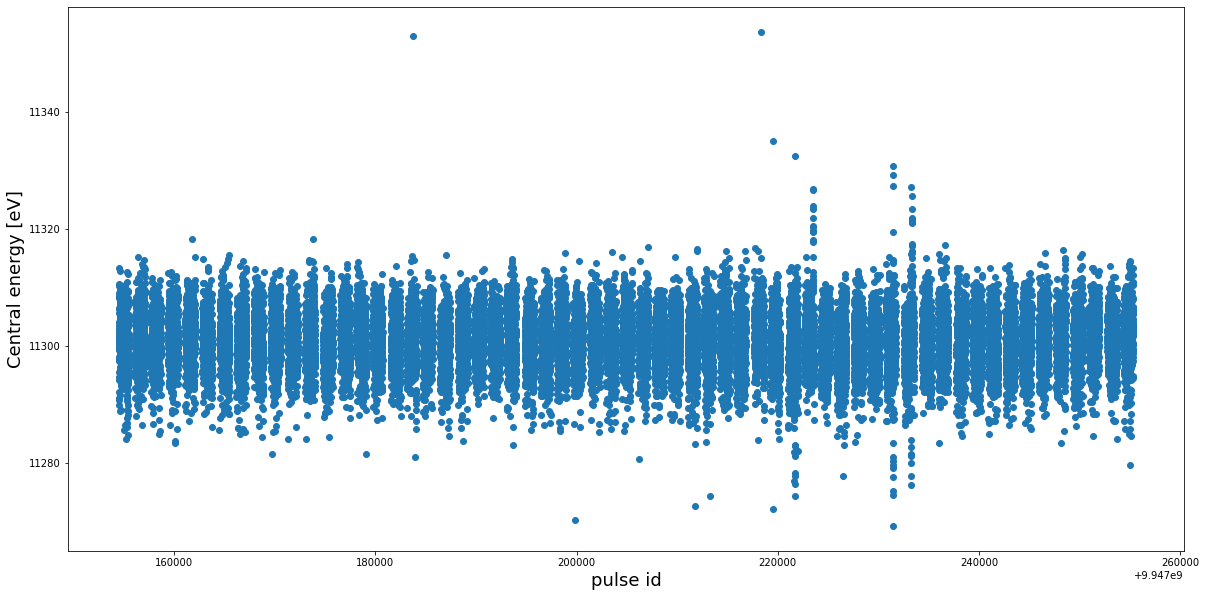

In [14]:
plt.figure(figsize=(20,10))
plt.scatter(Energy_with_PulseID[:,1], Energy_with_PulseID[:,0])
plt.xlabel('pulse id', fontsize=18)
plt.ylabel('Central energy [eV]', fontsize=18)
plt.show()

### Plot a single spectra

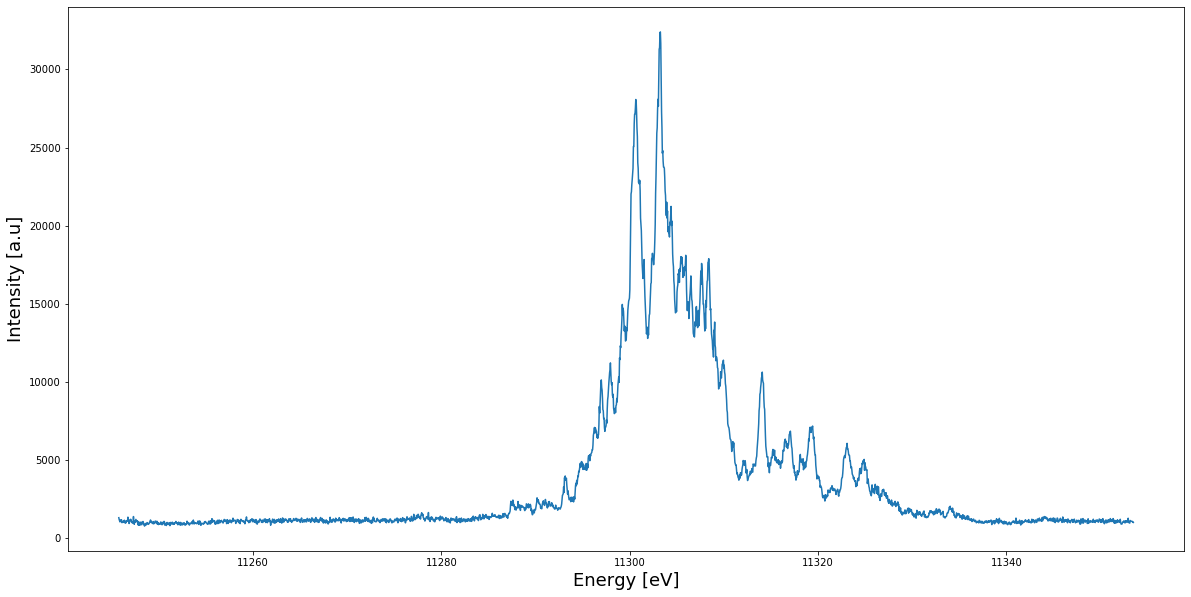

In [15]:
plt.figure(figsize=(20,10))
plt.plot(X[0], Y[5])
plt.xlabel('Energy [eV]', fontsize=18)
plt.ylabel('Intensity [a.u]', fontsize=18)
plt.show()

### Plot average spectra

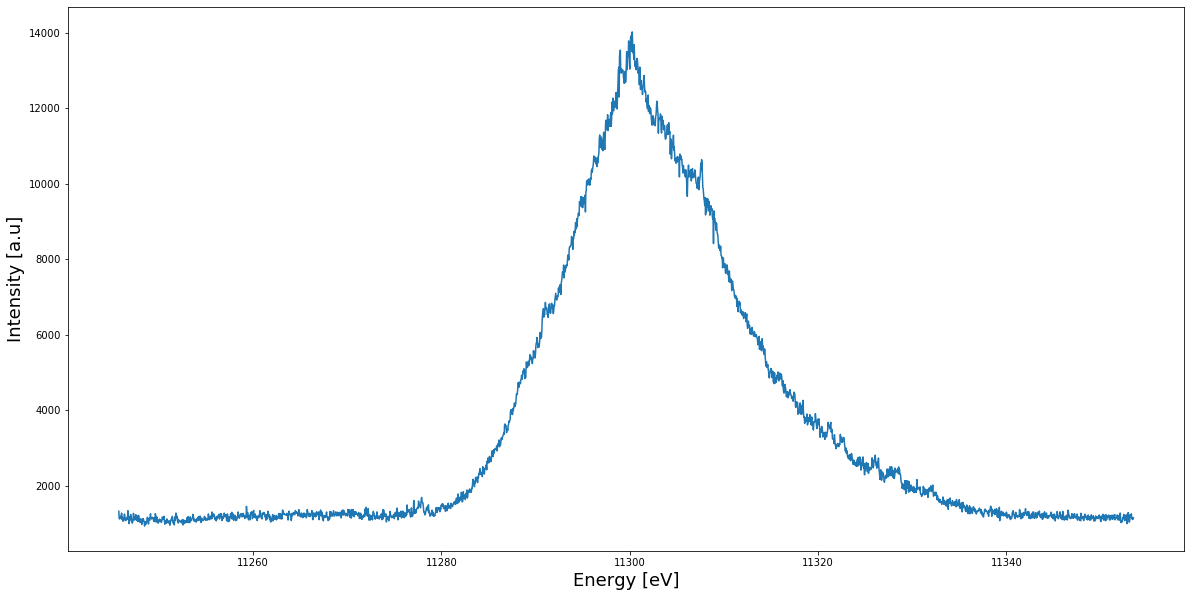

(2560,)
[1327.11763934 1138.80298361 1124.02563934 ... 1109.77790164 1112.48868852
 1155.73836066]


In [16]:
Y_mean = np.mean(Y, axis=0)

plt.figure(figsize=(20,10))
plt.plot(X[0],Y_mean)
plt.xlabel('Energy [eV]', fontsize=18)
plt.ylabel('Intensity [a.u]', fontsize=18)
plt.show()
print(Y_mean.shape)
print (Y_mean)

### Smooth the average spectra

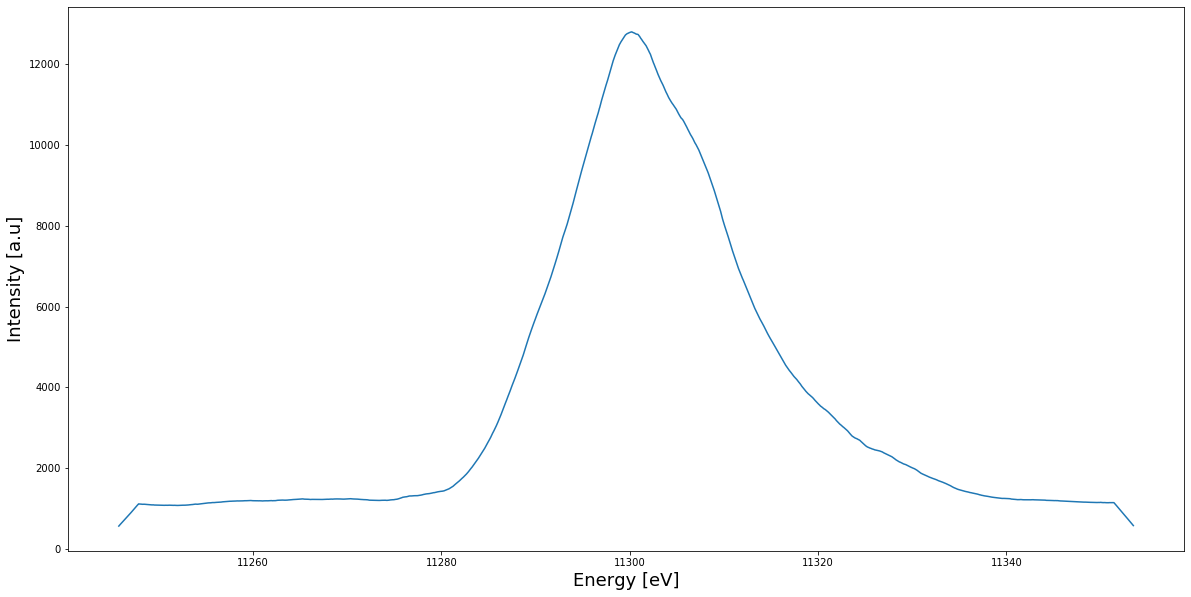

In [17]:
Y_mean = np.mean(Y, axis=0)

def smooth(y, box_pts):
    box = np.ones(box_pts)/box_pts
    y_smooth = np.convolve(y, box, mode='same')
    return y_smooth


plt.figure(figsize=(20,10))
#plt.plot(X[0],Y_mean)
plt.plot(X[0], smooth(Y_mean,100))
plt.xlabel('Energy [eV]', fontsize=18)
plt.ylabel('Intensity [a.u]', fontsize=18)
plt.show()

Y_smooth = smooth(Y_mean,100)

### Fit the smoothed spectra with Gaussian (it doesn't work but it's correctly written)

[1.2000e+04 1.1301e+04 1.0000e+01 1.2000e+03] [[inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]
 [inf inf inf inf]]


/sf/alvra/anaconda/dev/lib/python3.6/site-packages/scipy/optimize/minpack.py:787: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


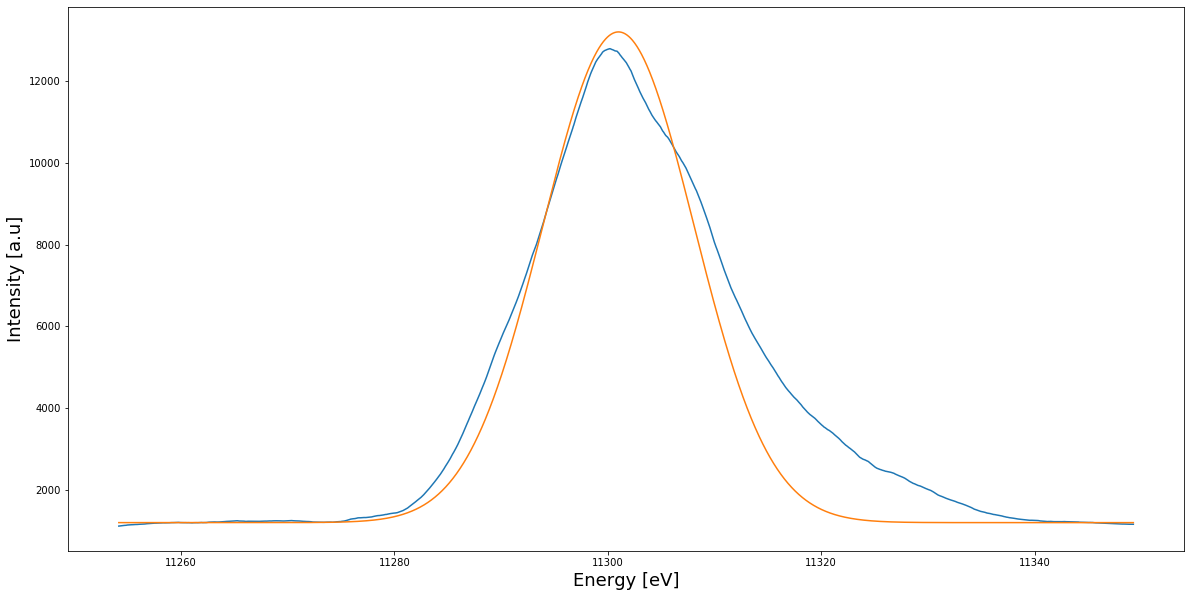

In [18]:
from scipy import asarray as ar, exp, sqrt, pi

xdata = ar(X[0][200:2460])
ydata = ar(smooth(Y_mean,100))
ydata = ydata[200:2460]

def gauss(x,a,mu,sigma,v):
    return a*exp(-(x-mu)**2/(sigma**2))+v

popt,pcov = curve_fit(gauss, xdata, ydata, p0=(12000,11301,10,1200))

print(popt,pcov)

plt.figure(figsize=(20,10))
plt.plot(xdata,ydata)
plt.plot(xdata, gauss(xdata, *popt))
plt.xlabel('Energy [eV]', fontsize=18)
plt.ylabel('Intensity [a.u]', fontsize=18)
plt.show()




### Try to fit 2-3 Gaussians

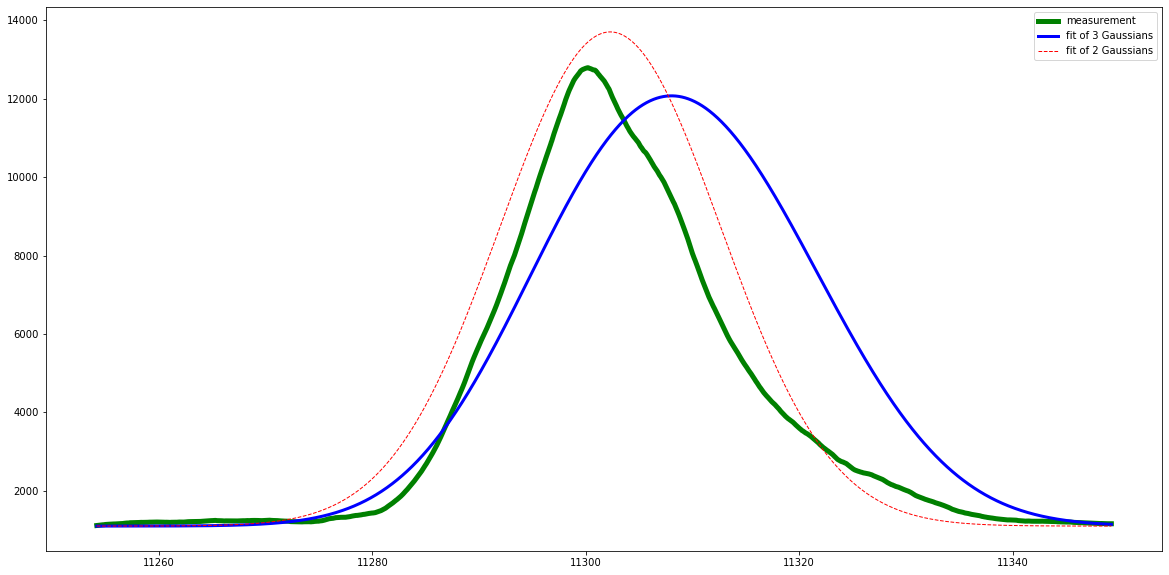

In [94]:
def gaussian(x, height, center, width, offset):
    return height*np.exp(-(x - center)**2/(2*width**2)) + offset

def three_gaussians(x, h1, c1, w1, h2, c2, w2, h3, c3, w3, offset):
    return (gaussian(x, h1, c1, w1, offset=0) +
        gaussian(x, h2, c2, w2, offset=0) +
        gaussian(x, h3, c3, w3, offset=0) + offset)

def two_gaussians(x, h1, c1, w1, h2, c2, w2, offset):
    return three_gaussians(x, h1, c1, w1, h2, c2, w2, 0,0,1, offset)

errfunc3 = lambda p, x, y: (three_gaussians(x, *p) - y)**2
errfunc2 = lambda p, x, y: (two_gaussians(x, *p) - y)**2

guess3 = [5000, 11300, 10, 3000, 11320, 10, 6000, 11310, 10, 1100]  # I guess there are 3 peaks, 2 are clear, but between them there seems to be another one, based on the change in slope smoothness there
guess2 = [7000, 11300, 10, 6000, 11305, 10, 1100]  # I removed the peak I'm not too sure about
optim3, success = leastsq(errfunc3, guess3[:], args=(xdata, ydata))
optim2, success = leastsq(errfunc2, guess2[:], args=(xdata, ydata))
optim3


plt.figure(figsize=(20,10))

plt.plot(xdata, ydata, lw=5, c='g', label='measurement')
plt.plot(xdata, three_gaussians(xdata, *optim3),
    lw=3, c='b', label='fit of 3 Gaussians')
plt.plot(xdata, two_gaussians(xdata, *optim2),
    lw=1, c='r', ls='--', label='fit of 2 Gaussians')
plt.legend(loc='best')

In [96]:
err3 = np.sqrt(errfunc3(optim3, xdata, ydata)).sum()
err2 = np.sqrt(errfunc2(optim2, xdata, ydata)).sum()
print('Residual error when fitting 3 Gaussians: {}\n'
    'Residual error when fitting 2 Gaussians: {}'.format(err3, err2))

Residual error when fitting 3 Gaussians: 3250597.0694009247
Residual error when fitting 2 Gaussians: 1827917.293306083


In [88]:
print(optim2, success)

[7.0000e+03 1.1300e+04 1.0000e+01 6.0000e+03 1.1305e+04 1.0000e+01
 1.1000e+03] 4


### Try to fit with lmfit

In [59]:
xdata.shape


(2260,)

[[Model]]
    Model(gaussian2)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 4
    # data points      = 226
    # variables        = 3
    chi-square         = 1.0368e+08
    reduced chi-square = 464950.132
    Akaike info crit   = 2952.20882
    Bayesian info crit = 2962.47042
##  Warning: uncertainties could not be estimated:
    amp:  at initial value
    cen:  at initial value
    wid:  at initial value
[[Variables]]
    amp:  12000.0000 (init = 12000)
    cen:  11301.0000 (init = 11301)
    wid:  140.000000 (init = 140)


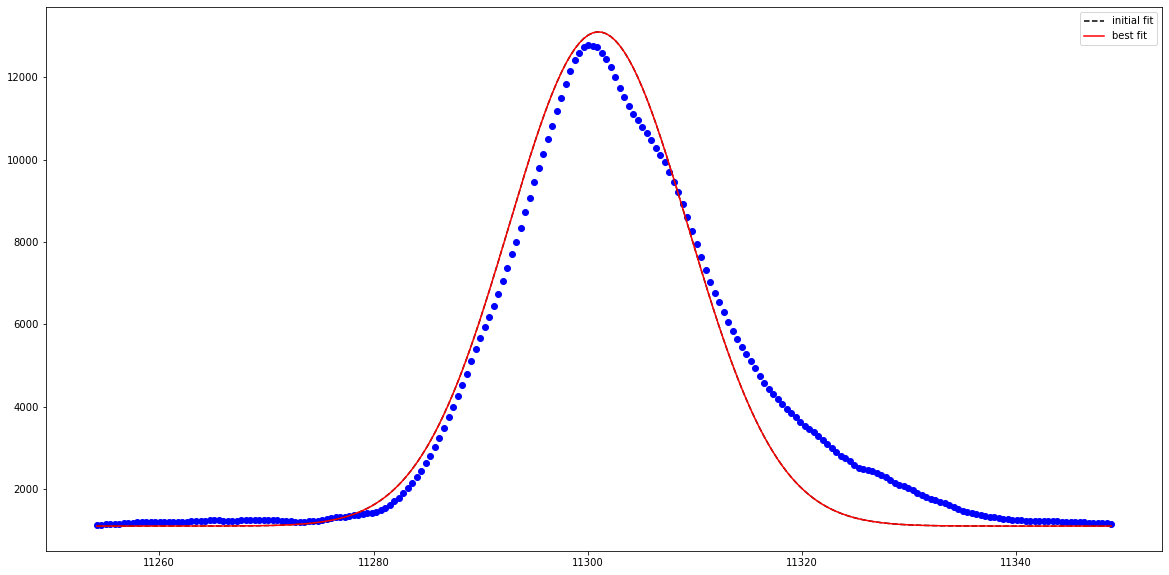

In [62]:
def gaussian(x, amp, cen, wid):
    
    return (amp / (sqrt(2*pi) * wid)) * exp(-(x-cen)**2 / (2*wid**2))

def gaussian2(x, amp, cen, wid):
    return amp * np.exp(-(x-cen)**2 / wid) +1100

gmodel = Model(gaussian2)
result = gmodel.fit(ydata[0::10], x=xdata[0::10], amp=12000, cen=11301, wid=140)

print(result.fit_report())

plt.figure(figsize=(20,10))
plt.plot(xdata[0::10], ydata[0::10], 'bo')
plt.plot(xdata[0::10], result.init_fit, 'k--', label='initial fit')
plt.plot(xdata[0::10], result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

In [52]:
import sklearn.mixture

ModuleNotFoundError: No module named 'sklearn'

Fitted mean =  0.015959292357827896
Fitted standard deviation =  1.04161308568399


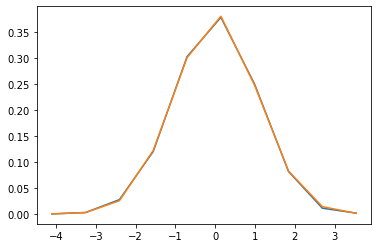

In [54]:
import numpy
from scipy.optimize import curve_fit
import matplotlib.pyplot as plt

# Define some test data which is close to Gaussian
data = numpy.random.normal(size=10000)

hist, bin_edges = numpy.histogram(data, density=True)
bin_centres = (bin_edges[:-1] + bin_edges[1:])/2

# Define model function to be used to fit to the data above:
def gauss(x, *p):
    A, mu, sigma = p
    return A*numpy.exp(-(x-mu)**2/(2.*sigma**2))

# p0 is the initial guess for the fitting coefficients (A, mu and sigma above)
p0 = [1., 0., 1.]

coeff, var_matrix = curve_fit(gauss, bin_centres, hist, p0=p0)

# Get the fitted curve
hist_fit = gauss(bin_centres, *coeff)

plt.plot(bin_centres, hist, label='Test data')
plt.plot(bin_centres, hist_fit, label='Fitted data')

# Finally, lets get the fitting parameters, i.e. the mean and standard deviation:
print ('Fitted mean = ', coeff[1])
print ('Fitted standard deviation = ', coeff[2])

plt.show()

In [55]:
var_matrix

array([[ 3.09169765e-06, -3.77699086e-10, -5.59831822e-06],
       [-3.77699086e-10,  3.04206886e-05,  1.92629479e-09],
       [-5.59831822e-06,  1.92629479e-09,  3.04154084e-05]])

In [97]:
coeff

array([0.38344773, 0.01595929, 1.04161309])

### Try normalizing data

[[Model]]
    Model(gaussian)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 15
    # data points      = 226
    # variables        = 4
    chi-square         = 18.0301844
    reduced chi-square = 0.08121705
    Akaike info crit   = -563.438228
    Bayesian info crit = -549.756088
##  Warning: uncertainties could not be estimated:
    amp:  at initial value
    cen:  at initial value
    wid:  at initial value
    off:  at initial value
[[Variables]]
    amp:  2.00000000 (init = 2)
    cen: -0.05000000 (init = -0.05)
    wid:  0.25000000 (init = 0.25)
    off:  0.70000000 (init = 0.7)


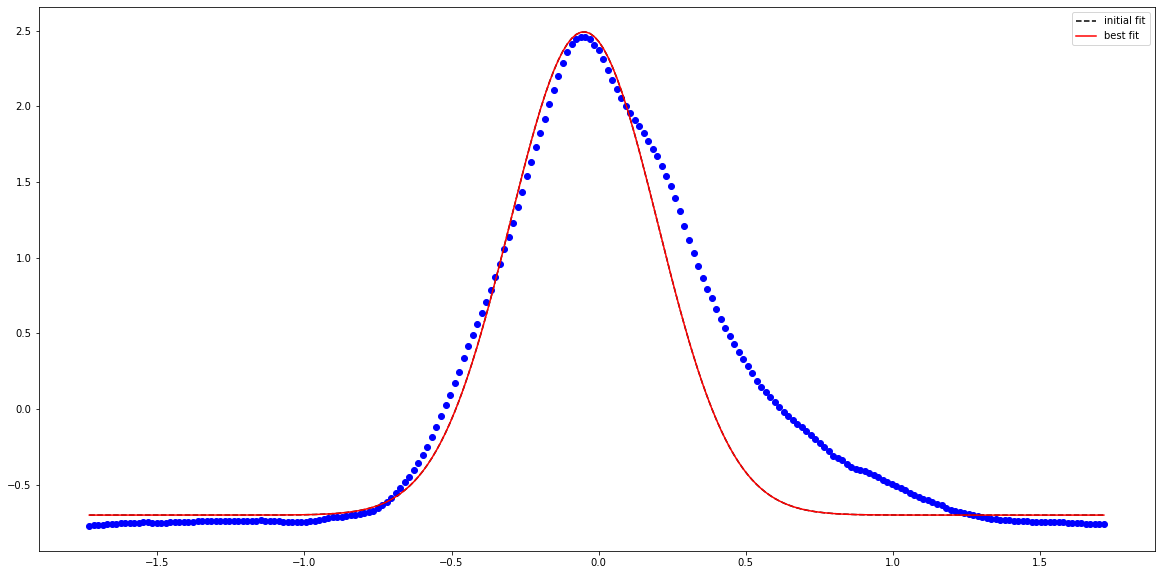

In [150]:
x_std=np.std(xdata)
x_mean=np.mean(xdata)

y_std=np.std(ydata)
y_mean=np.mean(ydata)

xnorm=(xdata-x_mean)/x_std
ynorm=(ydata-y_mean)/y_std

def gaussian(x, amp, cen, wid, off):
    return amp / (sqrt(2*pi) * wid) * np.exp(-(x-cen)**2 / (2*wid**2)) - off

gmodel = Model(gaussian)
result = gmodel.fit(ynorm[0::10], x=xnorm[0::10], amp=2, cen=-0.05, wid=0.25, off=0.7)

print(result.fit_report())

plt.figure(figsize=(20,10))
plt.plot(xnorm[0::10], ynorm[0::10], 'bo')
plt.plot(xnorm[0::10], result.init_fit, 'k--', label='initial fit')
plt.plot(xnorm[0::10], result.best_fit, 'r-', label='best fit')
plt.legend(loc='best')
plt.show()

### Try Voigt function

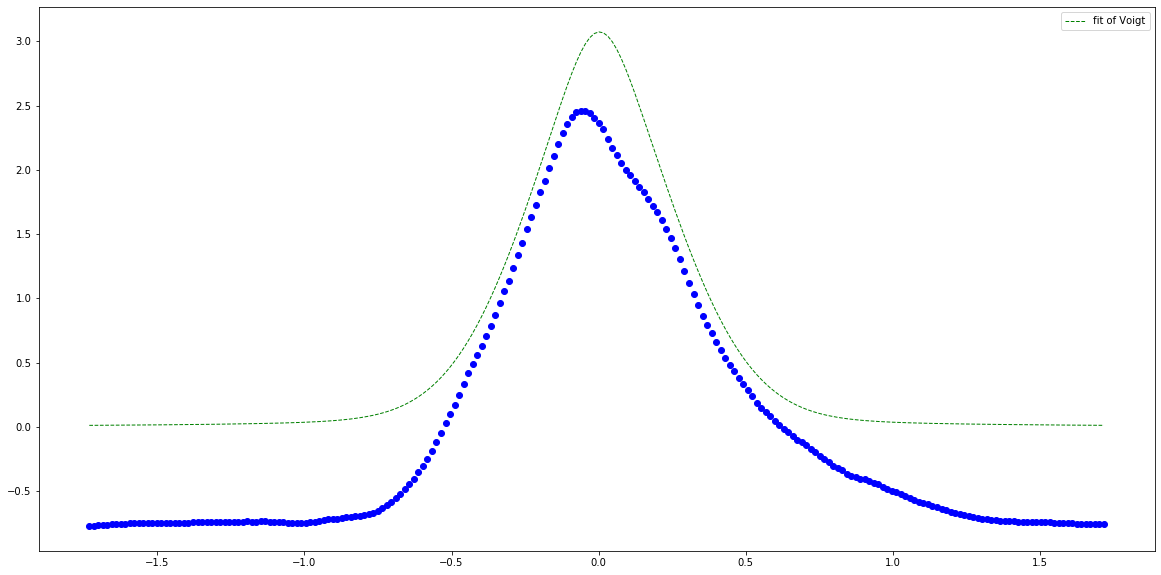

In [161]:
x_std=np.std(xdata)
x_mean=np.mean(xdata)

y_std=np.std(ydata)
y_mean=np.mean(ydata)

xnorm=(xdata-x_mean)/x_std
ynorm=(ydata-y_mean)/y_std


def _1Voigt(x, ampG1, cenG1, sigmaG1, ampL1, cenL1, widL1):
    return (ampG1*(1/(sigmaG1*(np.sqrt(2*np.pi))))*(np.exp(-((x-cenG1)**2)/((2*sigmaG1)**2)))) +\
              ((ampL1*widL1**2/((x-cenL1)**2+widL1**2)) )
    

popt_1Voigt, pcov_1Voigt = curve_fit(_1Voigt, xnorm, ynorm, p0=[1,0,0.2,1,0,0.2])
perr_1Voigt = np.sqrt(np.diag(pcov_1Voigt))


plt.figure(figsize=(20,10))
plt.plot(xnorm[0::10], ynorm[0::10], 'bo')

plt.plot(xnorm[0::10], _1Voigt(xnorm[0::10], *popt_1Voigt),
    lw=1, c='g', ls='--', label='fit of Voigt')
plt.legend(loc='best')
plt.show()

In [156]:
pcov_1Voigt

array([[inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf],
       [inf, inf, inf, inf, inf, inf]])

### Try example fitting with astropy

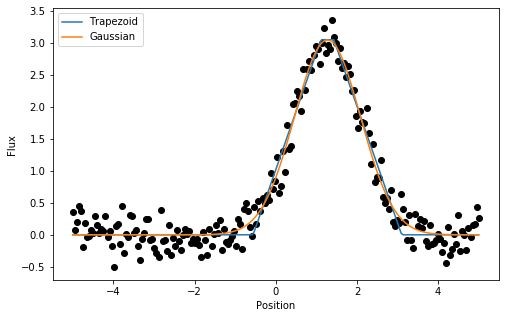

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(0)
x = np.linspace(-5., 5., 200)
y = 3 * np.exp(-0.5 * (x - 1.3)**2 / 0.8**2)
y += np.random.normal(0., 0.2, x.shape)

# Fit the data using a box model.
# Bounds are not really needed but included here to demonstrate usage.
t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5,
                            bounds={"x_0": (-5., 5.)})
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y)

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=1., mean=0, stddev=1.)
fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(8,5))
plt.plot(x, y, 'ko')
plt.plot(x, t(x), label='Trapezoid')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

### Fit the average spectra with astopy

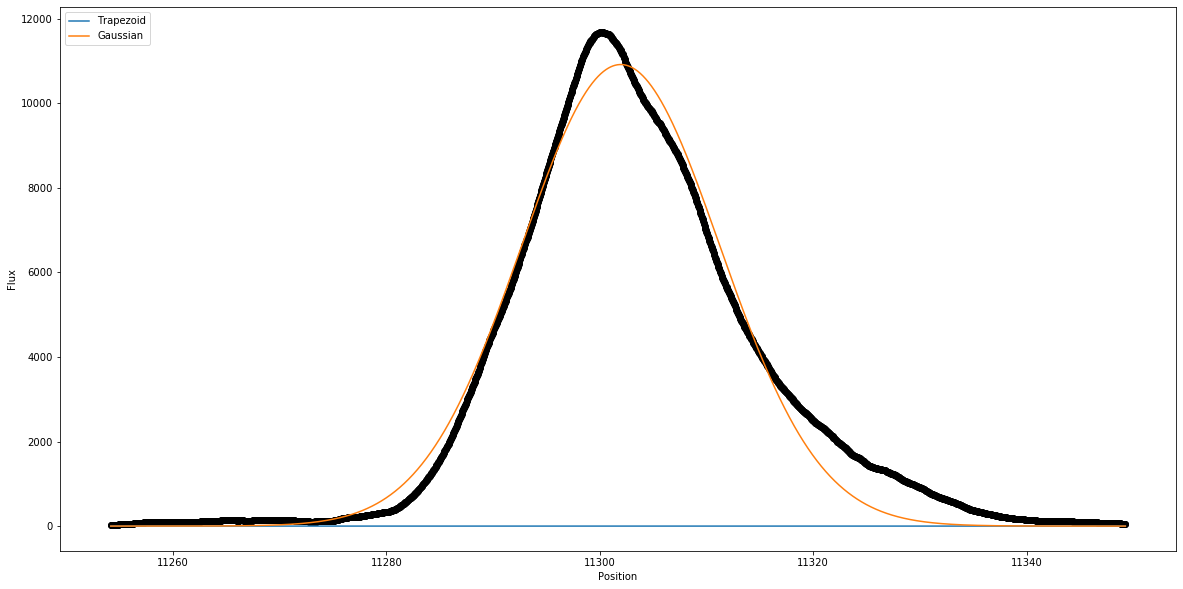

In [57]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.modeling import models, fitting

# Generate fake data
np.random.seed(0)
x = xdata
y = ydata-1100

# Fit the data using a box model.
# Bounds are not really needed but included here to demonstrate usage.
t_init = models.Trapezoid1D(amplitude=1., x_0=0., width=1., slope=0.5,
                            bounds={"x_0": (-5., 5.)})
fit_t = fitting.LevMarLSQFitter()
t = fit_t(t_init, x, y)

# Fit the data using a Gaussian
g_init = models.Gaussian1D(amplitude=10000., mean=11210, stddev=15.)
#g_init = models.Gaussian1D(amplitude=40000., mean=11210, stddev=19.)

fit_g = fitting.LevMarLSQFitter()
g = fit_g(g_init, x, y)

# Plot the data with the best-fit model
plt.figure(figsize=(20,10))
plt.plot(x, y, 'ko')
plt.plot(x, t(x), label='Trapezoid')
plt.plot(x, g(x), label='Gaussian')
plt.xlabel('Position')
plt.ylabel('Flux')
plt.legend(loc=2)

In [58]:
print(g)
g.amplitude.value

Model: Gaussian1D
Inputs: ('x',)
Outputs: ('y',)
Model set size: 1
Parameters:
        amplitude             mean              stddev     
    ------------------ ------------------ -----------------
    10917.767166760197 11301.962804620163 9.299640466956781


10917.767166760197